In [111]:
import pandas as pd

In [112]:
# Load the data
df_usagers = pd.read_csv('assets/usagers-2022.csv', sep=';')

In [113]:
print(df_usagers.columns)

Index(['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh', 'place', 'catu',
       'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'actp', 'etatp'],
      dtype='object')


# Age and Gender Analysis

Analyze the distribution of accident victims by age and gender in order to determine if certain age groups or genders are more prone to accidents.

In [114]:
# clean data by removing all rows where the Num_Acc or id_usager columns contain NaN to prevent errors in analysis
df_usagers.dropna(subset=['Num_Acc', 'id_usager','an_nais'], inplace=True)

In [115]:
import matplotlib.pyplot as plt

Here I am going to analyze age and gender distribution 

In [116]:
# Create a new column 'Age' to the so I am gonna use 2022 as the data was published in 2022
df_usagers['Age'] = 2022 - df_usagers['an_nais']
# In our data, the 'catu' columns contains 3 possible values and it is import to take data that concern the conductors only 
# that's why I have to specify the condition of (df_usagers['catu'] == 1) 
interesting_data = df_usagers[df_usagers['catu'] == 1][['Age', 'sexe']]
print(interesting_data)

         Age  sexe
0       14.0     1
1       74.0     1
2       34.0     1
3       52.0     1
4       20.0     1
...      ...   ...
126656  27.0     1
126657  20.0     2
126659  69.0     2
126660  30.0     1
126661  22.0     1

[91550 rows x 2 columns]


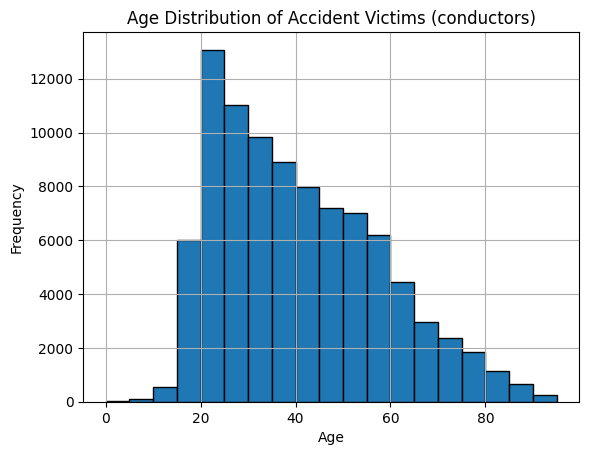

In [117]:
# Plot age distribution
df_usagers[df_usagers['catu'] == 1]['Age'].hist(bins=range(0, 100, 5), edgecolor='black')
plt.title('Age Distribution of Accident Victims (conductors)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

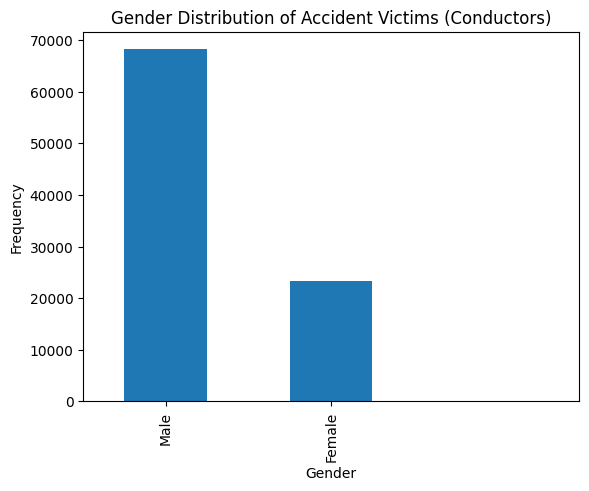

In [118]:
df_usagers[df_usagers['catu'] == 1]['sexe'].value_counts().plot(kind='bar')
plt.title('Gender Distribution of Accident Victims (Conductors)')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# Severity of Accidents
- Investigate the severity of injuries (grav), distinguishing between minor injuries, serious injuries, and fatalities.
- Identify factors that contribute to higher severity levels, such as the type of user (catu), either a driver, a passenger, or a pedestrian and safety equipment used (secu1, secu2, secu3).

In [119]:
# Create a dictionary to map old values to new names
index_mapping = {1: 'Unharmed', 2: 'Killed', 3: 'Hospitalized Injured', 4: 'Slightly Injured'}

# Set 'grav' as the index and then select the 'Num_Acc' column
df_usagers_filtred = df_usagers.set_index('grav')['Num_Acc']

# Replace the index values using the mapping dictionary
df_usagers_filtred.index = df_usagers_filtred.index.map(index_mapping)

print(df_usagers_filtred)

grav
Hospitalized Injured    202200000001
Unharmed                202200000001
Slightly Injured        202200000002
Unharmed                202200000002
Unharmed                202200000003
                            ...     
Unharmed                202200055301
Hospitalized Injured    202200055301
Slightly Injured        202200055301
Hospitalized Injured    202200055302
Unharmed                202200055302
Name: Num_Acc, Length: 123788, dtype: int64


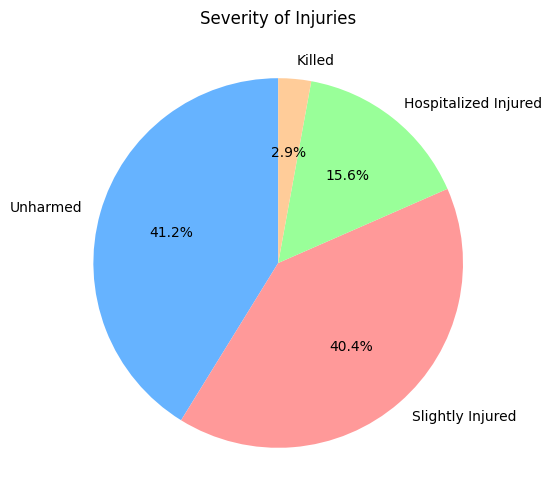

In [137]:
# Include only rows where 'grav' is not equal to -1.
df_usagers = df_usagers[df_usagers['grav'] != -1]

# Map the 'grav' values to the labels
df_usagers['severity'] = df_usagers['grav'].map(index_mapping)

# Plot severity distribution as a pie chart
severity_counts = df_usagers['severity'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])
plt.title('Severity of Injuries')
plt.ylabel('')  # Remove the y-label
plt.show()

In [160]:
# Analyze safety equipment usage
safety_eq_usage = df_usagers[['secu1', 'secu2', 'secu3']]

# create a dictionnary to map the possible values of 'secu1', 'secu2' and 'secu3' to new names
map_indexing = {-1:'Not specified', 0:'No equipment', 1:'Seatbelt', 2:'Helmet', 3:'Child safety device', 4:'Reflective vest', 5:'Airbag (2RM/3RM)', 6:'Gloves (2RM/3RM)', 7:'Gloves + Airbag (2RM/3RM)', 8:'Undeterminable', 9:'Other'}

# replace the values with the map_indexing
safety_eq_usage_replaced = safety_eq_usage.replace(map_indexing)

# count the frequency of each unique value in each of the columns 'secu1', 'secu2' and 'secu3'.
safety_eq_usage_replaced.apply(pd.Series.value_counts)

,secu1,secu2,secu3
Airbag (2RM/3RM),25,1211,19
Child safety device,773,172,2
Gloves (2RM/3RM),97,11683,60
Gloves + Airbag (2RM/3RM),5,151,4
Helmet,22645,102,8
No equipment,12139,42787,223
Not specified,144,55861,122441
Other,115,422,890
Reflective vest,102,1482,20
Seatbelt,73917,226,66


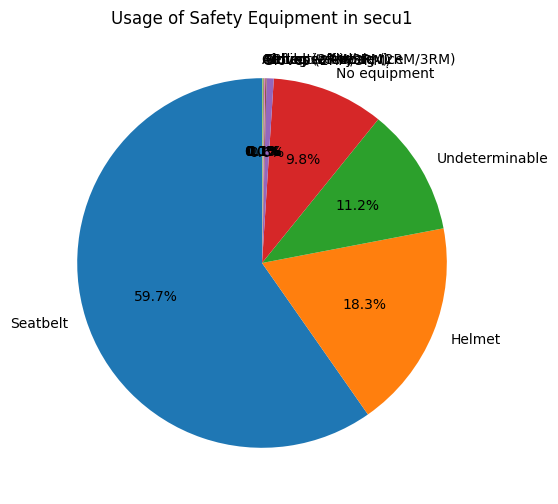

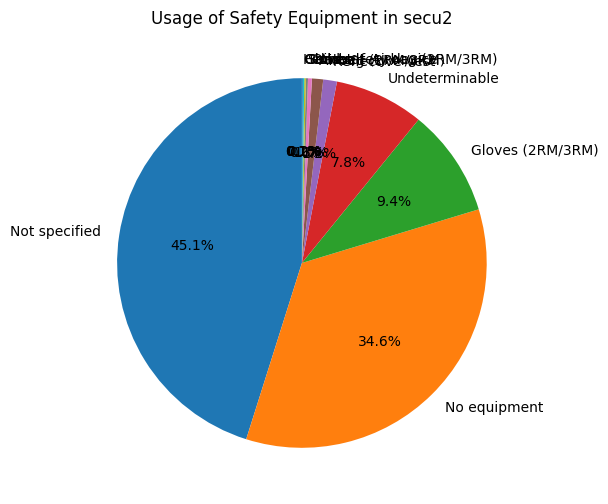

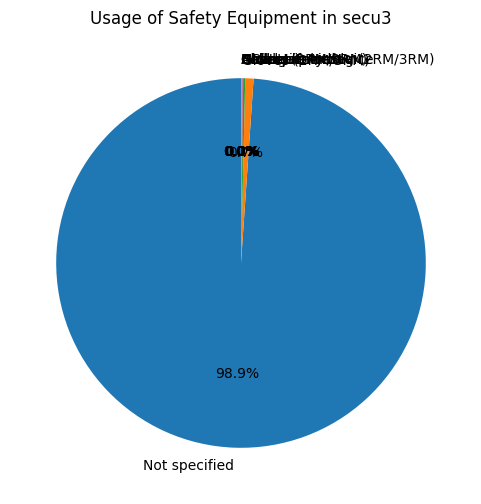

In [167]:
# Plotting the pie chart

for column in safety_eq_usage_replaced.columns:
    plt.figure(figsize=(6, 6))
    safety_eq_usage_replaced[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Usage of Safety Equipment in {column}')
    plt.ylabel('')  # Remove the y-label
    plt.show()

# Correlation Between Safety Equipment and Injury Severity

In [171]:
# Cross-tabulation of safety equipment and injury severity, I'll use 'secu1' because it contains many important informations
severity_vs_safety = pd.crosstab(safety_eq_usage_replaced['secu1'],df_usagers['severity'])
severity_vs_safety

severity,Hospitalized Injured,Killed,Slightly Injured,Unharmed
secu1,,,,
Airbag (2RM/3RM),6,3,8,8
Child safety device,67,13,319,374
Gloves (2RM/3RM),52,7,32,6
Gloves + Airbag (2RM/3RM),2,0,2,1
Helmet,6737,873,13137,1898
No equipment,3555,978,6707,899
Not specified,24,6,87,27
Other,32,6,35,42
Reflective vest,32,16,29,25


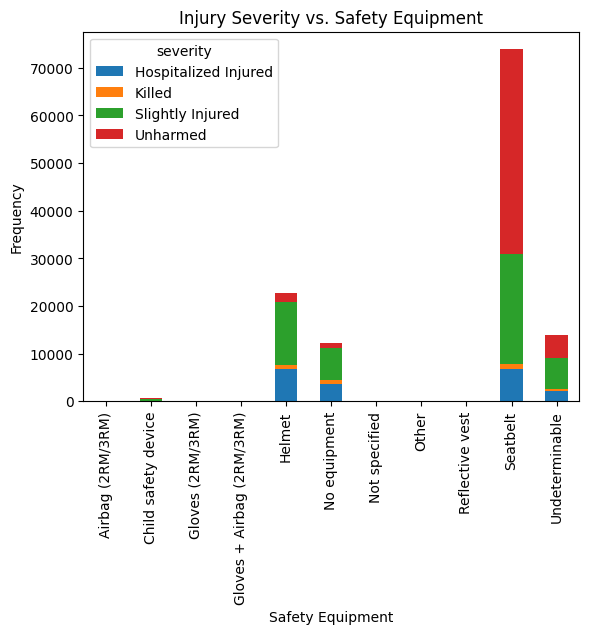

In [173]:
severity_vs_safety.plot(kind='bar', stacked=True)
plt.title('Injury Severity vs. Safety Equipment')
plt.xlabel('Safety Equipment')
plt.ylabel('Frequency')
plt.show()